<a href="https://colab.research.google.com/github/crea0414/1st_CVDL/blob/master/Day006_affine_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 範例

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2, os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_path = '/content/drive/My Drive/First_CV_DL191125/lena.png'
img = cv2.imread(img_path)

## Affine Transformation - Case 1: rotation 45 > scale 0..5 > shift (x+100, y-50)


Rotation Matrix
[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]

Translation Matrix
[[  1.   0. 100.]
 [  0.   1. -50.]]


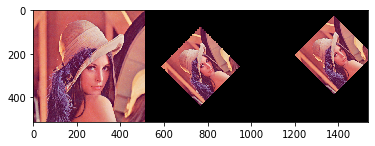

In [3]:
rows, cols = img.shape[:2]

# 取得旋轉矩陣
# getRotationMatrix2D(center, angle, scale)
M_rotate = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 0.5)
print('Rotation Matrix')
print(M_rotate)
print()

# 取得平移矩陣
M_translate = np.array([[1, 0, 100], 
                        [0, 1, -50]], dtype=np.float32)
print('Translation Matrix')
print(M_translate)

# 旋轉
img_rotate = cv2.warpAffine(img, M_rotate, (cols, rows))

# 平移
img_rotate_trans = cv2.warpAffine(img_rotate, M_translate, (cols, rows))

# 組合 + 顯示圖片
img_show_rotate_trans = np.hstack((img, img_rotate, img_rotate_trans))
img_show_rotate_trans = cv2.cvtColor(img_show_rotate_trans, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rotate_trans);

# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

## Affine Transformation - Case 2: any three point

In [4]:
'''
50*a + 50*b + 1*c = 80
50*d + 50*e + 1*f = 80
300*a + 100*b + 1*c = 330
300*d + 100*e + 1*f = 150
200*a + 300*b + 1*c = 300
200*d + 300*e + 1*f = 300
'''

'\n50*a + 50*b + 1*c = 80\n50*d + 50*e + 1*f = 80\n300*a + 100*b + 1*c = 330\n300*d + 100*e + 1*f = 150\n200*a + 300*b + 1*c = 300\n200*d + 300*e + 1*f = 300\n'

In [5]:
a, b, c = 103/110, 7/22, 190/11
50*a + 50*b + c, 300*a + 100*b + 1*c, 200*a + 300*b + 1*c

(80.0, 330.0, 300.0)

In [6]:
d, e, f = 13/110, 89/110, (80 - 50*13/110 - 50*89/110)
50*d + 50*e + 1*f, 300*d + 100*e + 1*f, 200*d + 300*e + 1*f

(80.0, 150.0, 300.0)

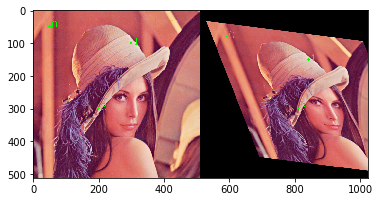

In [7]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 取得 affine 矩陣並做 affine 操作
M_affine = np.array([[a, b, c],
                     [d, e, f]], dtype=np.float32)
img_affine = cv2.warpAffine(img, M_affine, (rows, cols))

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_copy, img_affine))
img_show_affine = cv2.cvtColor(img_show_affine, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_affine);